<a href="https://colab.research.google.com/github/ShaktiMS/MLDL-expt-2/blob/main/Expt_2_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

df.columns = df.columns.str.strip()

df_clean = df.drop(['Country', 'Year'], axis=1)
df_clean.fillna(df_clean.mean(numeric_only=True), inplace=True)

df_final = pd.get_dummies(df_clean, columns=['Status'], drop_first=True)

print(f"Data Shape: {df_final.shape}")
print(df_final.head())

Data Shape: (2938, 20)
   Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0             65.0            263.0             62     0.01   
1             59.9            271.0             64     0.01   
2             59.9            268.0             66     0.01   
3             59.5            272.0             69     0.01   
4             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  3

In [ ]:
X = df_final.drop('Life expectancy', axis=1)
y = df_final['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f} years")
print(f"R² Score (Accuracy): {r2:.2f}")

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Root Mean Squared Error (RMSE): 3.90 years
R² Score (Accuracy): 0.82
      Actual  Predicted
2546    73.7  67.185528
650     75.9  77.442566
1740    74.2  75.498768
177     76.8  77.945713
1377    51.9  47.060969


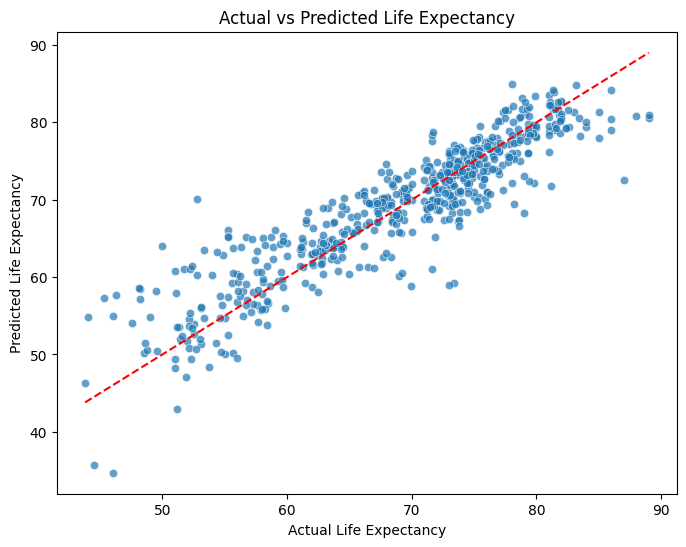

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()


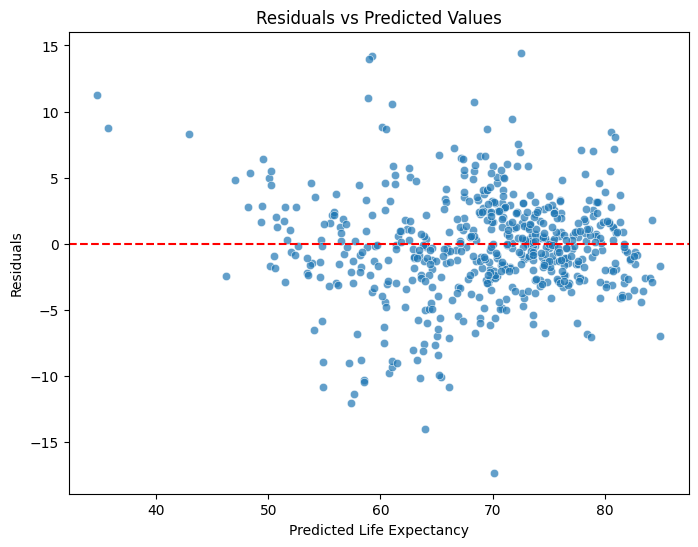

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
